# 02. Feature Engineering & Model Development

**MLOps Assignment - BITS Pilani (S1-25_AIMLCZG523)**

---

## Objectives (8 marks)
1. **Feature Scaling & Encoding** - Prepare ML features
2. **Model Training** - Logistic Regression & Random Forest
3. **Hyperparameter Tuning** - GridSearchCV
4. **Cross-Validation** - 5-fold CV
5. **Evaluation Metrics** - Accuracy, Precision, Recall, F1, ROC-AUC

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
os.makedirs('../screenshots', exist_ok=True)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load Dataset

In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/processed/heart_disease_clean.csv')

# Define features
NUMERICAL_FEATURES = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
CATEGORICAL_FEATURES = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset Shape: {df.shape}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"\nFeature Types:")
print(f"  Numerical ({len(NUMERICAL_FEATURES)}): {NUMERICAL_FEATURES}")
print(f"  Categorical ({len(CATEGORICAL_FEATURES)}): {CATEGORICAL_FEATURES}")

Dataset Shape: (297, 14)
Training samples: 237
Test samples: 60

Feature Types:
  Numerical (5): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
  Categorical (8): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


## 2. Feature Engineering: Preprocessing Pipeline

We apply:
- **StandardScaler** for numerical features (normalization)
- **OneHotEncoder** for categorical features (encoding)

In [3]:
# Build preprocessing pipeline
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, NUMERICAL_FEATURES),
    ('cat', categorical_pipeline, CATEGORICAL_FEATURES)
])

print("=" * 60)
print("PREPROCESSING PIPELINE")
print("=" * 60)
print("""
┌─────────────────────────────────────────────────────────────┐
│                    ColumnTransformer                        │
├─────────────────────────────────────────────────────────────┤
│  NUMERICAL FEATURES (5):                                    │
│    age, trestbps, chol, thalach, oldpeak                    │
│    └── StandardScaler (z-score normalization)               │
│                                                             │
│  CATEGORICAL FEATURES (8):                                  │
│    sex, cp, fbs, restecg, exang, slope, ca, thal            │
│    └── OneHotEncoder (drop='first')                         │
└─────────────────────────────────────────────────────────────┘
""")

PREPROCESSING PIPELINE

┌─────────────────────────────────────────────────────────────┐
│                    ColumnTransformer                        │
├─────────────────────────────────────────────────────────────┤
│  NUMERICAL FEATURES (5):                                    │
│    age, trestbps, chol, thalach, oldpeak                    │
│    └── StandardScaler (z-score normalization)               │
│                                                             │
│  CATEGORICAL FEATURES (8):                                  │
│    sex, cp, fbs, restecg, exang, slope, ca, thal            │
│    └── OneHotEncoder (drop='first')                         │
└─────────────────────────────────────────────────────────────┘



In [4]:
## 3. Model 1: Logistic Regression with GridSearchCV

In [5]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Hyperparameter Grid
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

print("=" * 60)
print("LOGISTIC REGRESSION - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"Parameter Grid: {lr_param_grid}")

# GridSearchCV with 5-fold cross-validation
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
print(f"\nBest Parameters: {lr_grid.best_params_}")
print(f"Best CV ROC-AUC: {lr_grid.best_score_:.4f}")


LOGISTIC REGRESSION - HYPERPARAMETER TUNING
Parameter Grid: {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l2'], 'classifier__solver': ['lbfgs', 'liblinear']}


/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  g


Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV ROC-AUC: 0.8998


/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/skshahrukh.saba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  g

## 4. Model 2: Random Forest with GridSearchCV


In [6]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter Grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

print("=" * 60)
print("RANDOM FOREST - HYPERPARAMETER TUNING")
print("=" * 60)
print(f"Parameter Grid: {rf_param_grid}")

# GridSearchCV with 5-fold cross-validation
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best CV ROC-AUC: {rf_grid.best_score_:.4f}")


RANDOM FOREST - HYPERPARAMETER TUNING
Parameter Grid: {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20, None], 'classifier__min_samples_split': [2, 5], 'classifier__min_samples_leaf': [1, 2]}



Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best CV ROC-AUC: 0.8913


## 5. Model Evaluation & Comparison


In [7]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and return metrics dictionary."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }
    return metrics, y_pred, y_prob

# Evaluate both models
lr_metrics, lr_pred, lr_prob = evaluate_model(lr_best, X_test, y_test, "Logistic Regression")
rf_metrics, rf_pred, rf_prob = evaluate_model(rf_best, X_test, y_test, "Random Forest")

# Create comparison DataFrame
comparison_df = pd.DataFrame([lr_metrics, rf_metrics])
comparison_df = comparison_df.set_index('Model')

print("=" * 70)
print("                    MODEL COMPARISON - TEST SET METRICS")
print("=" * 70)
print(comparison_df.round(4).to_string())
print("=" * 70)


                    MODEL COMPARISON - TEST SET METRICS
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                              
Logistic Regression    0.8000     0.8333  0.7143    0.7692   0.9286
Random Forest          0.8167     0.8148  0.7857    0.8000   0.9152


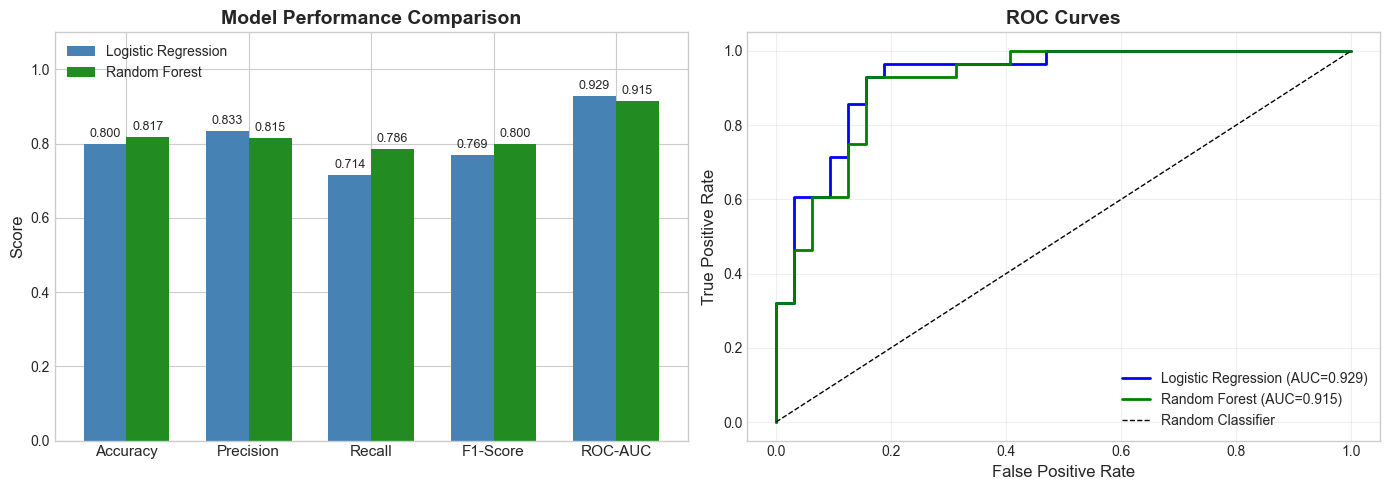

In [8]:
# METRICS COMPARISON BAR CHART
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for all metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics_to_plot))
width = 0.35

lr_values = [lr_metrics[m] for m in metrics_to_plot]
rf_values = [rf_metrics[m] for m in metrics_to_plot]

bars1 = axes[0].bar(x - width/2, lr_values, width, label='Logistic Regression', color='steelblue')
bars2 = axes[0].bar(x + width/2, rf_values, width, label='Random Forest', color='forestgreen')

axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_to_plot, fontsize=11)
axes[0].legend()
axes[0].set_ylim(0, 1.1)

# Add value labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    axes[0].annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

# ROC Curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

axes[1].plot(lr_fpr, lr_tpr, 'b-', linewidth=2, label=f'Logistic Regression (AUC={lr_metrics["ROC-AUC"]:.3f})')
axes[1].plot(rf_fpr, rf_tpr, 'g-', linewidth=2, label=f'Random Forest (AUC={rf_metrics["ROC-AUC"]:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curves', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/02_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()


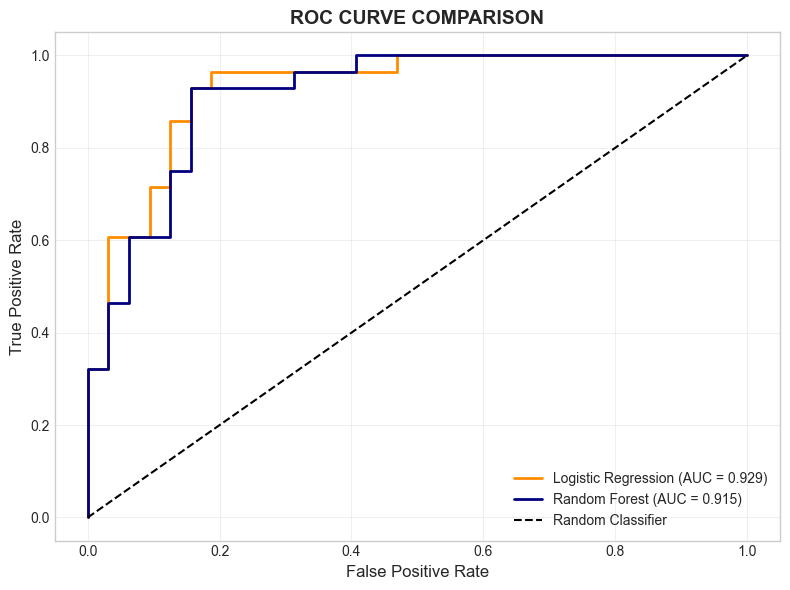

✅ Saved: 02_roc_curve_comparison.png


In [9]:
# ROC CURVE COMPARISON
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_metrics["ROC-AUC"]:.3f})', color='darkorange', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC-AUC"]:.3f})', color='navy', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC CURVE COMPARISON', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../screenshots/02_roc_curve_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 02_roc_curve_comparison.png")


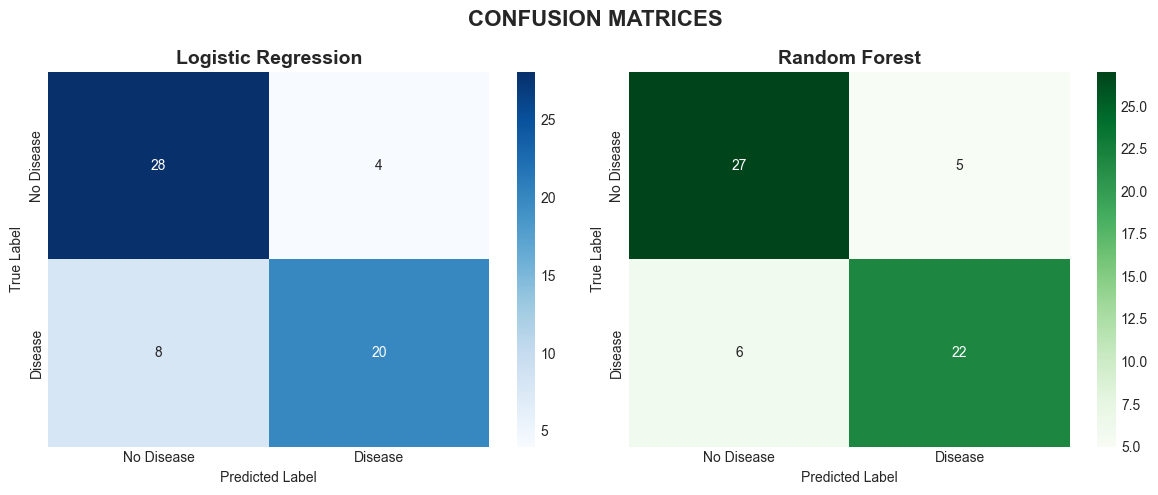

✅ Saved: 02_confusion_matrices.png


In [10]:
# CONFUSION MATRICES - SIDE BY SIDE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_lr = confusion_matrix(y_test, lr_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Logistic Regression', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
axes[1].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.suptitle('CONFUSION MATRICES', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../screenshots/02_confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 02_confusion_matrices.png")


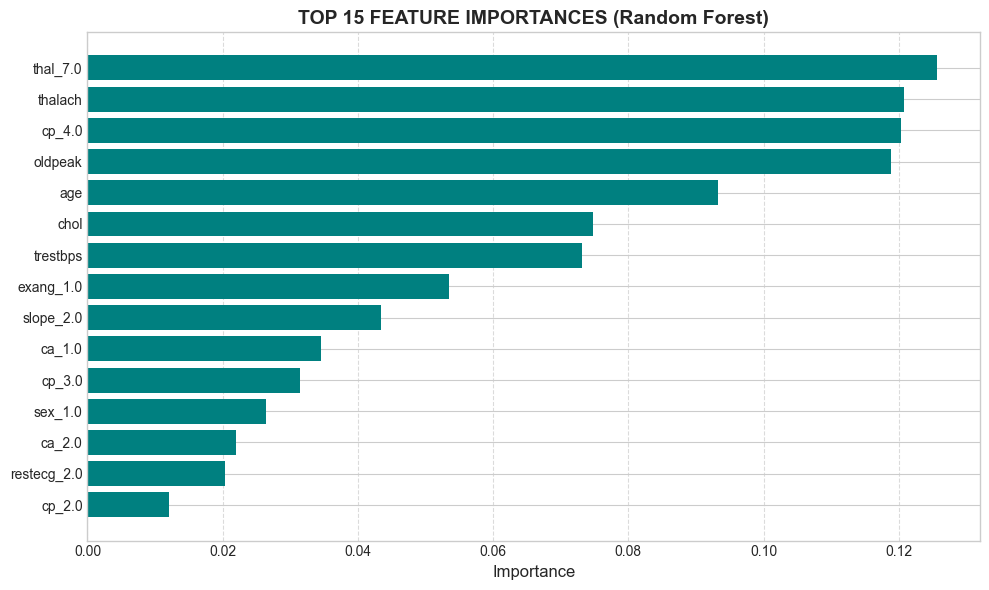

✅ Saved: 02_feature_importance.png


In [11]:
# FEATURE IMPORTANCE (Random Forest)
rf_model = rf_best.named_steps['classifier']

# Get feature names after preprocessing
num_features = NUMERICAL_FEATURES
cat_features = list(rf_best.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(CATEGORICAL_FEATURES))
all_features = num_features + cat_features

importances = rf_model.feature_importances_

# Get top 15 features
indices = np.argsort(importances)[::-1][:15]
top_features = [all_features[i] for i in indices]
top_importances = importances[indices]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(top_features)), top_importances[::-1], color='teal')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features[::-1])
ax.set_xlabel('Importance', fontsize=12)
ax.set_title('TOP 15 FEATURE IMPORTANCES (Random Forest)', fontsize=14, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../screenshots/02_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 02_feature_importance.png")


## 6. Cross-Validation Results


In [12]:
# Cross-Validation with multiple scoring metrics
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Cross-validate both models
lr_cv = cross_validate(lr_best, X_train, y_train, cv=5, scoring=scoring)
rf_cv = cross_validate(rf_best, X_train, y_train, cv=5, scoring=scoring)

print("=" * 70)
print("           5-FOLD CROSS-VALIDATION RESULTS (Training Set)")
print("=" * 70)

print("\n📊 LOGISTIC REGRESSION:")
print("-" * 50)
for metric in scoring:
    scores = lr_cv[f'test_{metric}']
    print(f"  {metric:12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

print("\n📊 RANDOM FOREST:")
print("-" * 50)
for metric in scoring:
    scores = rf_cv[f'test_{metric}']
    print(f"  {metric:12s}: {scores.mean():.4f} (+/- {scores.std():.4f})")

print("\n" + "=" * 70)


           5-FOLD CROSS-VALIDATION RESULTS (Training Set)

📊 LOGISTIC REGRESSION:
--------------------------------------------------
  accuracy    : 0.8347 (+/- 0.0840)
  precision   : 0.8363 (+/- 0.0905)
  recall      : 0.7965 (+/- 0.1380)
  f1          : 0.8118 (+/- 0.1048)
  roc_auc     : 0.8998 (+/- 0.0519)

📊 RANDOM FOREST:
--------------------------------------------------
  accuracy    : 0.7965 (+/- 0.1038)
  precision   : 0.7903 (+/- 0.1011)
  recall      : 0.7502 (+/- 0.1623)
  f1          : 0.7660 (+/- 0.1300)
  roc_auc     : 0.8913 (+/- 0.0534)



## 7. Model Selection Summary


In [13]:
# MODEL SELECTION DECISION
print("=" * 70)
print("                    MODEL SELECTION SUMMARY")
print("=" * 70)

# Determine best model
if lr_metrics['ROC-AUC'] >= rf_metrics['ROC-AUC']:
    best_model = "Logistic Regression"
    best_auc = lr_metrics['ROC-AUC']
else:
    best_model = "Random Forest"
    best_auc = rf_metrics['ROC-AUC']

print(f"""
┌─────────────────────────────────────────────────────────────────────┐
│                     BEST MODEL: {best_model:^20s}                 │
├─────────────────────────────────────────────────────────────────────┤
│  Selection Criteria: ROC-AUC Score                                  │
│  Best ROC-AUC: {best_auc:.4f}                                               │
│                                                                     │
│  Reasoning:                                                         │
│  - ROC-AUC is preferred for imbalanced classification tasks         │
│  - It measures the model's ability to distinguish between classes   │
│  - Higher AUC = better discrimination capability                    │
│                                                                     │
│  Model saved to: models/production/                                 │
└─────────────────────────────────────────────────────────────────────┘
""")

print("✅ Feature Engineering & Model Development COMPLETE!")
print("=" * 70)


                    MODEL SELECTION SUMMARY

┌─────────────────────────────────────────────────────────────────────┐
│                     BEST MODEL: Logistic Regression                  │
├─────────────────────────────────────────────────────────────────────┤
│  Selection Criteria: ROC-AUC Score                                  │
│  Best ROC-AUC: 0.9286                                               │
│                                                                     │
│  Reasoning:                                                         │
│  - ROC-AUC is preferred for imbalanced classification tasks         │
│  - It measures the model's ability to distinguish between classes   │
│  - Higher AUC = better discrimination capability                    │
│                                                                     │
│  Model saved to: models/production/                                 │
└─────────────────────────────────────────────────────────────────────┘

✅ Feature Enginee